# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong
                                                 
변수 선언 및 실행 함수는 아래 있음.

In [1]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
# dat_list.append(list(chunks(dat_list_pre, 3)))
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [3]:
# 차원 축소 함수
# dat_list = list(itertools.chain(*dat_list))
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                    #print("e-06 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                    #print("e-05 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                    #print("e-04 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                    #print("e-03 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                    #print("e-02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                    #print("e-01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                    #print("e+00 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                    #print("e+01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                    #print("e+02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                    #print("e+03 complete")
    #print("Complete") 
    #print("=================")
    return dat_list_xyz

In [4]:
#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                for l in range(20):
                    if(l < 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                            #print(dat_list_xyz[i][j][k])
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                    elif(l >= 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                        
                
               
    return dat_list_xyz

In [5]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(디텍터 갯수, 크리스탈의 x축 갯수, 크리스탈의 y축 갯수, 크리스탈의 z축 갯수, 원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(detector_amount, crystal_x_amount, crystal_y_amount, crystal_z_amount, r, x_len, y_len, z_len):
    crystal_x_num = int((int(crystal_x_amount)/2))
    r = r-(x_len/2)
    
    
    result = []
    for i in range(int(detector_amount)):
        detector = []
        crystal = []
        crystal_z_num = int((int(crystal_z_amount)/2))
        for j in range(int(crystal_z_amount)):
            
            crystal_y_num = int((int(crystal_y_amount)/2))
            for k in range(int(crystal_y_amount)):
                crystal.append([r + (x_len/2), (y_len * crystal_y_num), (z_len * -crystal_z_num)])
                crystal_y_num = crystal_y_num - 1
            crystal_z_num = crystal_z_num - 1
        detector.append(crystal)
        result.append(detector)
    result = list(itertools.chain(*result))
    detector_rot = result
    result = []
    
    detector_num = 0
    for i in range(int(detector_amount)):
        det_rot = []
        for j in range(len(detector_rot[i])):
            det_rot.append([format((detector_rot[i][j][0]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)) - (detector_rot[i][j][1]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format((detector_rot[i][j][0]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)) + (detector_rot[i][j][1]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format(detector_rot[i][j][2],".3f")])
        detector_num += 1
        result.append(det_rot)
    
            
    
    return result

In [6]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_crystal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

In [7]:
def rotate_edge(crystal_edge, detector_num):
    rotate_crystal_edge_1 = []
    for i in range(detector_num):
        for j in range(len(crystal_edge)):
            for k in range(len(crystal_edge[j])):
                rotate_crystal_edge_1.append([(crystal_edge[j][k][0]*math.cos(((360/detector_num))*i*math.pi/180)) - (crystal_edge[j][k][1]*math.sin(((360/detector_num))*i*math.pi/180)),\
                                               (crystal_edge[j][k][0]*math.sin(((360/detector_num))*i*math.pi/180)) + (crystal_edge[j][k][1]*math.cos(((360/detector_num))*i*math.pi/180)),\
                                                crystal_edge[j][k][2]])
            
    return rotate_crystal_edge_1

In [8]:
def rotate_edge_yss(x, y, z, angle):
    rotate_crystal_edge_1 = []
    x = float(x)
    y = float(y)
    z = float(z)
    rotate_crystal_edge_1.append([(x*math.cos(angle*math.pi/180)) - (y*math.sin(angle*math.pi/180)),\
                               (x*math.sin(angle*math.pi/180)) + (y*math.cos(angle*math.pi/180)),\
                                z])
    return rotate_crystal_edge_1


In [9]:
# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)


def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_number = []
    
    
    for l in tqdm.tqdm(range(len(dat_list))):
        detector_num = []
        sort_data_1 = []
        for m in range(len(dat_list[l])):
                    # 여기까지 데이터 읽어오기
            for i in range(len(rotate_crystal_edge_chunks)):
                # 디텍터 헤드 갯수
                
                x_max = -1000
                x_min = 1000
                y_max = -1000
                y_min = 1000
                z_max = -1000
                z_min = 1000
                for j in range(len(rotate_crystal_edge_chunks[i])):
                    # 크리스탈 갯수
                    for k in range(len(rotate_crystal_edge_chunks[i][j])):
                        # 모서리 갯수
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                            x_max = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                            x_min = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                            y_max = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                            y_min = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) > z_max):
                            z_max = rotate_crystal_edge_chunks[i][j][k][2]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) < z_min):
                            z_min = rotate_crystal_edge_chunks[i][j][k][2]
                #print(str(i)+" : " + str(x_min) + " < x < " + str(x_max) + ", " + str(y_min) + " < y < " + str(y_max))
                if(float(dat_list[l][m][0])>x_min and float(dat_list[l][m][0])<x_max):
                    if(float(dat_list[l][m][1])>y_min and float(dat_list[l][m][1])<y_max):    
                        if(float(dat_list[l][m][2])>z_min and float(dat_list[l][m][2])<z_max):
                            detector_num.append(i)
                            #if(m == 1):
                            sort_data_1.append(dat_list[l][m])
        
    # 버려지는 데이터들이 있어서 쌍이 있는 데이터들만 남기겠다.
    # 여기서 엄청많이 버려진다 데이터가....
        if(len(detector_num)==2):
            sort_data.append(sort_data_1)
            detector_number.append(detector_num)    

    return detector_number

In [10]:
# 정렬된 데이터와 디텍터 번호를 받아와 티텍터의 회전각만큼 회전변환을 통해 중심값으로 변경시키는 함수
# rotate_detector(정렬된 데이터, 디텍터 번호가 적힌 리스트, 디텍터 갯수)
def rotate_detector(sort_dat, detector_number, detector_num):
    a = 0
    b = 0
    c = 0
    final_dat = []
    angle = float(360/int(detector_num))
    for idx,detector_n in enumerate(detector_number):
        #print(detector_n)
        #print(idx)
        # 먼저 x축과 평행한 디텍터로 옮기는 작업(회전변환)
        
        #data = rotate_edge_yss(sort_dat[idx][0],sort_dat[idx][1],sort_dat[idx][2],detector_num-(angle*float(detector_n)))
        data = rotate_edge_yss(sort_dat[idx][0],sort_dat[idx][1],sort_dat[idx][2],-(angle*float(detector_n)))
        
        #if(idx % 100 == 0):
            #print(idx)
            #print(data)
        #for j in range(len(sort_dat)):
            # 데이터를 읽은 후에 xyz범위를 찾아야지
        for i in range(len(origin_crystal_edge)):
            
            x_min = float(origin_crystal_edge[i][0][0])
            x_max = float(origin_crystal_edge[i][4][0])
            y_min = float(origin_crystal_edge[i][2][1])
            y_max = float(origin_crystal_edge[i][0][1])
            z_min = float(origin_crystal_edge[i][2][2])
            z_max = float(origin_crystal_edge[i][3][2])
            
            if(c == 0):
                print("=====",i,"=====")
                print(x_min,"<=x<",x_max)
                print(y_min,"<=y<",y_max)
                print(z_min,"<=z<",z_max)
                print("============")
            

            if(float(data[0][0])>=x_min and float(data[0][0])<x_max):
                if(float(data[0][1])>=y_min and float(data[0][1])<y_max):
                    if(float(data[0][2])>=z_min and float(data[0][2])<z_max):
                        after_data = rotate_edge_yss(crystal_location[0][i][0],crystal_location[0][i][1],crystal_location[0][i][2],angle*detector_n)
                        a = a+1
                        final_dat.append(after_data)
                
        c = c+1
    print("전체 데이터:",len(sort_dat))
    print("범위 내의 값:",a)                    
    print("범위 밖의 값:",len(sort_dat)-a)
    print("=================")

    return final_dat
                

In [11]:
def start_preprocessing(detector_head_num, ctystal_x_num, ctystal_y_num, ctystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len):
    dat_list_all = []
    dat_list_pre = []
    dat_list = []
    dat_list_xyz_1 = []
    global sort_data
    global detector_num
    global origin_crystal_edge
    global crystal_location


    #print("--------------" + dat_file_list[i]) + "----------------")
    print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
    for i in range(len(dat_file_list)):
        idx = 0
        print(str(i+1) + "번째 파일")
        txt_data = open(dat_file_list[i],'r')
        for j in txt_data:
            j = " ".join(j.split())
            j = j.split(" ")
            dat_list_all.append(j)
            #print(dat_list_all)

    print("=================")
    
    dat_len = len(dat_list_all) - 1
    
    for i in range(len(dat_list_all) -1):
        #print(i)
        dat_list_pre.append(dat_list_all[i][8])
        dat_list_pre.append(dat_list_all[i][9])
        dat_list_pre.append(dat_list_all[i][10])
        dat_list_pre.append(dat_list_all[i][31])
        dat_list_pre.append(dat_list_all[i][32])
        dat_list_pre.append(dat_list_all[i][33])

    dat_list.append(list(chunks(dat_list_pre, 3)))
    dat_list = list(itertools.chain(*dat_list))
    dat_list_xyz_1.append(list(chunks(dat_list,2)))
    dat_list_xyz_1 = list(itertools.chain(*dat_list_xyz_1))

    print("좌표 가져오기 완료!")
    print("=================")
    txt_data.close()
    
    # 실제 데이터를 form에 맞게 수정
    global dat_list_xyz
    dat_list_xyz = make_form(dat_list_xyz_1, dat_len)
    
    #print(dat_list_xyz)
    
    # 각 크리스탈의 중심값 찾기 (detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이(원점으로부터 헤드까지 거리), 크리스탈의 x_len(cm), y_len(cm), z_len(cm))

    crystal_location = YSS_find_xyz_center(detector_head_num, ctystal_x_num, ctystal_y_num, ctystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)
    print("0번 디텍터 크리스탈 중심값:",crystal_location[0])
    # 각 크리스탈의 모서리 값 구하기
    origin_crystal_edge = []
    for j in range(len(crystal_location[0])):
        # find_crystal_edge(크리스탈 중점 x좌표, 크리스탈 중점 y좌표, 크리스탈 중점 z좌표, 크리스탈의 x_len, y_len z_len)
        origin_crystal_edge.append(find_crystal_edge(crystal_location[0][j][0],\
                              crystal_location[0][j][1],\
                              crystal_location[0][j][2],\
                              crystal_x_len, crystal_y_len, crystal_z_len))  
    
    # 모서리 회전변환
    # rotate_edge(0번 디텍터 크리스탈 엣지, 디텍터 헤드 갯수)
    rotate_crystal_edge = rotate_edge(origin_crystal_edge, detector_head_num)

    # 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
    rotate_crystal_edge_chunks_1 = []
    global rotate_crystal_edge_chunks
    rotate_crystal_edge_chunks = []
    rotate_crystal_edge_chunks_1.append(list(chunks(rotate_crystal_edge, 8)))
    rotate_crystal_edge_chunks_1 = list(itertools.chain(*rotate_crystal_edge_chunks_1))
    rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge_chunks_1, 9)))
    rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))
    
    # 함수 실행
    
    sort_data = []
    global detector_number
    global detector_num
    # find_detector(원본 데이터, 각 크리스탈의 모서리값)
    detector_number = find_detector(dat_list_xyz, rotate_crystal_edge_chunks)
    #detector_number = list(itertools.chain(*detector_number))
    #sort_data = list(itertools.chain(*sort_data)
    
    # 차원 축소 작업
    detector_num = detector_number
    detector_num = list(itertools.chain(*detector_num))
    sort_dat = sort_data
    sort_dat = list(itertools.chain(*sort_dat))
    #sort_dat = list(itertools.chain(*sort_dat))
    
    # ============================================
    print("sort_dat_len:",len(sort_dat))
    print("detector_num_len:",len(detector_num))
    # ============================================
    
    # 함수 돌리기
    # rotate_detector(차원이 변경된 원본데이터, 각 coincidence가 감지된 디텍터 헤드 번호, 디텍터 헤드 갯수)
    final_output = rotate_detector(sort_dat, detector_num, detector_head_num)
    #print(final_output)
    # 차원 축소 작업
    final_data = final_output

    final_data = list(itertools.chain(*final_data))

    final_dat = []
    for i in range(len(final_data)):
        final_dat.append([float(final_data[i][0]), float(final_data[i][1]), float(final_data[i][2])])

    final_data_1=[]
    final_data_1.append(list(chunks(final_dat, 2)))
    final_data_1 = list(itertools.chain(*final_data_1))
    
    print("preprocessing complete!")
    
    return final_data_1

---

---

---

---

---

# 실행 부분
## 변수 값만 변경할것
## 데이터 경로 설정에서 각 파일 명에 대한 슬라이싱 범위 체크할것

In [12]:
# 데이터 경로 설정
dat_dir = "./"
dat_file_list = glob.glob(dat_dir + '/*.txt')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[1][-27:])

# 파일명 슬라이싱
dat_file_list = [dat_file_list[1][-27:]]

['.\\20190306_Coincidences.txt', '.\\30x2x2_odd_coincidences.txt', '.\\center_Coincidences.txt', '.\\right_Coincidences.txt', '.\\testCoincidences.txt']
30x2x2_odd_coincidences.txt


In [13]:
# 변수 정의

#디텍터 헤드 갯수
detector_head_num =  6

# 크리스탈 각 축의 갯수
ctystal_x_num = 1
ctystal_y_num = 3
ctystal_z_num = 3

# 단위 = cm
zero_to_head_len = 44
crystal_x_len = 3
crystal_y_len = 11
crystal_z_len = 13



In [14]:
# 실행 함수
final_data_1 =start_preprocessing(detector_head_num, ctystal_x_num, ctystal_y_num, ctystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)

1개의 파일을 변환합니다.
1번째 파일
좌표 가져오기 완료!
0번 디텍터 크리스탈 중심값: [['44.000', '11.000', '-13.000'], ['44.000', '0.000', '-13.000'], ['44.000', '-11.000', '-13.000'], ['44.000', '11.000', '0.000'], ['44.000', '0.000', '0.000'], ['44.000', '-11.000', '0.000'], ['44.000', '11.000', '13.000'], ['44.000', '0.000', '13.000'], ['44.000', '-11.000', '13.000']]


100%|███████████████████████████████████████████████████████████████████████████| 11196/11196 [00:25<00:00, 436.97it/s]


sort_dat_len: 11814
detector_num_len: 11814
===== 0 =====
42.5 <=x< 45.5
5.5 <=y< 16.5
-19.5 <=z< -6.5
===== 1 =====
42.5 <=x< 45.5
-5.5 <=y< 5.5
-19.5 <=z< -6.5
===== 2 =====
42.5 <=x< 45.5
-16.5 <=y< -5.5
-19.5 <=z< -6.5
===== 3 =====
42.5 <=x< 45.5
5.5 <=y< 16.5
-6.5 <=z< 6.5
===== 4 =====
42.5 <=x< 45.5
-5.5 <=y< 5.5
-6.5 <=z< 6.5
===== 5 =====
42.5 <=x< 45.5
-16.5 <=y< -5.5
-6.5 <=z< 6.5
===== 6 =====
42.5 <=x< 45.5
5.5 <=y< 16.5
6.5 <=z< 19.5
===== 7 =====
42.5 <=x< 45.5
-5.5 <=y< 5.5
6.5 <=z< 19.5
===== 8 =====
42.5 <=x< 45.5
-16.5 <=y< -5.5
6.5 <=z< 19.5
전체 데이터: 11814
범위 내의 값: 7749
범위 밖의 값: 4065
preprocessing complete!


In [15]:
print(final_data_1)

[[[-44.0, 5.3884459162483544e-15, 0.0], [44.0, 0.0, 0.0]], [[22.000000000000004, 38.1051177665153, 0.0], [-44.0, 5.3884459162483544e-15, 0.0]], [[44.0, 0.0, 0.0], [-12.473720558371198, -43.6051177665153, 0.0]], [[12.473720558371179, 43.6051177665153, 0.0], [-44.0, 5.3884459162483544e-15, 0.0]], [[44.0, 0.0, 0.0], [12.473720558371179, -43.6051177665153, 0.0]], [[-22.00000000000002, -38.10511776651529, 0.0], [22.000000000000004, 38.1051177665153, 0.0]], [[31.52627944162883, -32.6051177665153, 0.0], [12.473720558371179, 43.6051177665153, 0.0]], [[-12.473720558371198, -43.6051177665153, 0.0], [22.000000000000004, -38.1051177665153, 0.0]], [[-21.99999999999999, 38.105117766515306, 0.0], [-21.99999999999999, 38.105117766515306, 0.0]], [[22.000000000000004, -38.1051177665153, 0.0], [12.473720558371179, 43.6051177665153, 0.0]], [[-12.473720558371198, -43.6051177665153, 0.0], [-22.00000000000002, -38.10511776651529, 0.0]], [[22.000000000000004, 38.1051177665153, 0.0], [31.52627944162883, 32.605

In [16]:
for i in range(len(dat_list_xyz)):
    if(i < 10):
        print(dat_list_xyz[i])

[['-44.32000000000001', '-2.23', '-0.000163'], ['42.64000000000001', '2.161', '0.014870000000000003']]
[['25.980000000000004', '35.13', '-0.00016050000000000003'], ['-25.41', '-34.34', '0.02953']]
[['-39.86000000000001', '-16.490000000000002', '-0.01446'], ['39.64', '16.439999999999998', '0.00391']]
[['-10.75', '-42.79', '-0.0001621'], ['10.59', '42.550000000000004', '0.05965000000000001']]
[['10.51', '-41.900000000000006', '-0.0001587'], ['-10.360000000000001', '41.31', '0.0001565']]
[['-31.85', '28.740000000000006', '-0.2666'], ['31.57', '-28.580000000000002', '0.0001564']]
[['-45.220000000000006', '4.379', '-0.01658'], ['43.35', '-4.177', '0.00016']]
[['-16.490000000000002', '-40.010000000000005', '-0.0001589'], ['16.75', '40.66', '0.00016150000000000002']]
[['39.760000000000005', '21.160000000000004', '-0.004'], ['-38.480000000000004', '-20.470000000000002', '0.12070000000000002']]
[['-43.150000000000006', '4.258', '-0.00015930000000000002'], ['44.17', '-4.382', '0.04374']]


In [17]:
for i in range(len(final_data_1)):
    if(i<10):
        print(final_data_1[i])

[[-44.0, 5.3884459162483544e-15, 0.0], [44.0, 0.0, 0.0]]
[[22.000000000000004, 38.1051177665153, 0.0], [-44.0, 5.3884459162483544e-15, 0.0]]
[[44.0, 0.0, 0.0], [-12.473720558371198, -43.6051177665153, 0.0]]
[[12.473720558371179, 43.6051177665153, 0.0], [-44.0, 5.3884459162483544e-15, 0.0]]
[[44.0, 0.0, 0.0], [12.473720558371179, -43.6051177665153, 0.0]]
[[-22.00000000000002, -38.10511776651529, 0.0], [22.000000000000004, 38.1051177665153, 0.0]]
[[31.52627944162883, -32.6051177665153, 0.0], [12.473720558371179, 43.6051177665153, 0.0]]
[[-12.473720558371198, -43.6051177665153, 0.0], [22.000000000000004, -38.1051177665153, 0.0]]
[[-21.99999999999999, 38.105117766515306, 0.0], [-21.99999999999999, 38.105117766515306, 0.0]]
[[22.000000000000004, -38.1051177665153, 0.0], [12.473720558371179, 43.6051177665153, 0.0]]


## R Phi Theta를 구하는 함수 


In [18]:
def cal_angle (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = float(zero_to_head_len + crystal_x_len/2 ) *2  #  float(zero_to_head_len + crystal_x_len/2 )  디텍터 반지름
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        
    elif d == 0:
        phi = 90*math.pi/180
        radius = det_y1
        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    return  result

## Theta 구하는 공식 적용해서 indirect plane과 direct plane 합치기

In [19]:
Theta = math.atan(crystal_z_len/( float(zero_to_head_len + crystal_x_len/2 ) *2))
Theta

0.1418970546041639

In [20]:
zero_to_head_len +crystal_x_len/2

45.5

## def Phi_ angle : angle_flag가 True 이면 degree로 sinogram ,angle_flag가 False 이면 rad로 sinogram 

## final_data_1 데이터를 받아 R, Theta, Phi 로 바꾼 Numpy리스트 : numpyrecord를 만듬

## Theta 구하는 공식 적용해서 indirect plane과 direct plane 합치기

In [36]:


def drawSinogram (angle_flag = False):
    final_data_2=np.array(final_data_1)
    record = []
    record1 = []
    for i in range(0,len(final_data_1)-1):
        record.append(cal_angle(final_data_2[i][0],final_data_2[i][1]))
    numpyrecord = np.array(record)
    #앞에서 정의하였던 cal_angle 함수를 이용하여 record 함수를 만든다.
    
    Theta = math.atan(crystal_z_len/( float(zero_to_head_len + crystal_x_len/2 ) *2))
    # Theta 범위를 지정해주기 위한 값 
    # indirect plane 값
    
    for i in range (0,len(numpyrecord)):
        if (numpyrecord[:][i][2]>= -Theta) or (numpyrecord[:][i][2]<= Theta):
            record1.append(numpyrecord[:][i][:])
    # Theta 범위 안에 있는 값들만 뽑아서 record1에 더해주었다.
    
    
    Phi = [] # R Phi Theta 값 중에서 Phi 값 만을 뽑기 위해 만든 리스트
    Phi_degree = []
    Phi_degree1 = []
    Phi_rad = []
    Phi_rad1 = []
    R = []  #R Phi Theta 값 중에서 R 값 만을 뽑기 위해 만든 리스트
    
    for i in range(0,len(record1)):
        Phi.append(record1[:][i][1])
        
    for i in range(0,len(record1)):
        R.append(record1[:][i][0])
    R1 = np.array(R) 
    R2 = R1+float(zero_to_head_len +crystal_x_len/2) # 음수 값을 없애주기 위해서 반지름을 더함
        
        
        
    if angle_flag : # True 일 때 는 degree로 계산한다.
        for j in range (0,len(record1)):
            Phi_degree.append(math.degrees(Phi[j]))
        Phi_degrees = np.array(Phi_degree)
        Phi_degrees[Phi_degrees < 0 ] = Phi_degrees[Phi_degrees < 0 ] + 180 # 음수인 각도들을 180도를 더해줘서 바꿔준다.
        for i in range(0,len(Phi_degrees)):
            Phi_degree1.append(int(Phi_degrees[i]))
        
        image = np.zeros((180,int(float(zero_to_head_len +crystal_x_len/2) *2)),dtype =np.float64) 
        # Sinogram 이미지를 만들기위해서 빈 이미지를 만들어준다.
        
        for i in range(0, len(Phi_degree1)):
            image[Phi_degree1[i]][int(R2[i])] = image[Phi_degree1[i]][int(R2[i])] + 1
        # image를 Phi_degree1의 값과 R2의 값에 따라 픽셀의 값을 올려준다, 
      
        fig, (ax1) = plt.subplots(1, 1, figsize = (12,10))
        ax1.set_title("Sinogram")
        ax1.set_xlabel("Projection position ")
        ax1.set_ylabel("Projection angle (deg)")
        plt.imshow(image, cmap=plt.cm.Greys_r)
            
        
            
            
            
    else : # False 일 때 rad 로 계산한다,
        for i in range(0,len(record1)):
            Phi_rad.append(Phi[i])
        Phi_rad1 = np.array(Phi_rad)
        Phi_rad1[Phi_rad1 < 0 ] = Phi_rad1[Phi_rad1 < 0 ] + math.pi/2
        Phi_rad1 = Phi_rad1 * 100
        image = np.zeros((158,int(float(zero_to_head_len +crystal_x_len/2) *2)),dtype =np.float64)
        for i in range(0, len(Phi_rad1)):
            image[int(Phi_rad1[i])][int(R2[i])] = image[int(Phi_rad1[i])][int(R2[i])] + 1
            
        fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
        ax2.set_title("Sinogram")
        ax2.set_xlabel("Projection position ")
        ax2.set_ylabel("Projection angle (rad)")
        plt.imshow(image, cmap=plt.cm.Greys_r)
        
        
        
        

## Phi_angle(angle_flag=True) : degree로 sinogram 표현

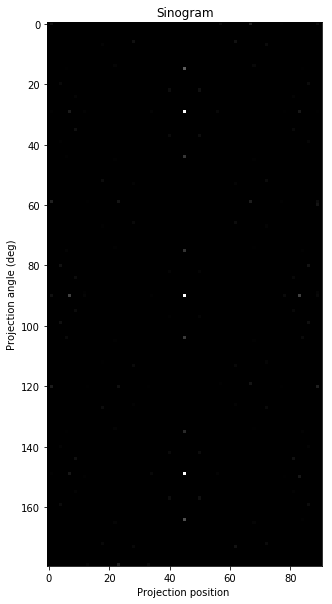

In [37]:
drawSinogram(angle_flag=True)

## Phi_angle(angle_flag=False) : rad로 sinogram 표현

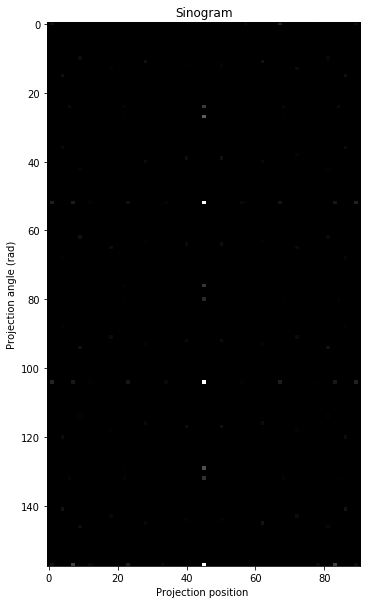

In [38]:
drawSinogram(angle_flag=False)

In [24]:
final_data_2=np.array(final_data_1)
record = []
record1 = []
for i in range(0,len(final_data_1)-1):
    record.append(cal_angle(final_data_2[i][0],final_data_2[i][1]))
numpyrecord = np.array(record)
    
Theta = math.atan(crystal_z_len/( float(zero_to_head_len + crystal_x_len/2 ) *2))
    # Theta 범위를 지정해주기 위한 값 
    # indirect plane 값
    
for i in range (0,len(numpyrecord)):
    if (numpyrecord[:][i][2]>= -Theta)or (numpyrecord[:][i][2]<= Theta):
        record1.append(numpyrecord[:][i][:])

In [25]:
record2 = []
for i in range(0, len(numpyrecord)):
    record2.append(numpyrecord[:][i][2])


In [26]:
record3 = np.array(record2)

In [27]:
record3.max()


0.0

In [28]:
record3.min()

0.0

In [29]:
numpyrecord

array([[ 2.69422296e-15,  1.57079633e+00,  0.00000000e+00],
       [-2.20000000e+01, -1.04719755e+00,  0.00000000e+00],
       [ 2.68906887e+01, -9.13281092e-01,  0.00000000e+00],
       ...,
       [ 3.26051178e+01, -5.23598776e-01,  0.00000000e+00],
       [-3.56568038e+01, -4.21204867e-01,  0.00000000e+00],
       [ 2.68906887e+01, -1.33916459e-01,  0.00000000e+00]])